In [154]:
import numpy as np
import matplotlib.pyplot as plt

import aero_model
import dynamic
import atmosphere
# Modèle d'avion
aircraft = aero_model.Airbus_A319_100()

aircraft.set_options(stall=True, buffeting=True, wave_drag=True)

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
atm = atmosphere.AtmosphereISA()

def optimize_for_range_existing_trim_mass_cg(aero_m, altp, mass, cg_pct_mac, plot=False):
    """
    Optimisation de Fn/V en utilisant graceful_trim avec masse et centrage variables.
    Retourne : sol_opt, tas_opt, solutions
    """
    aero_m.m = mass
    rxg = cg_pct_mac / 100.0  
    aero_m.set_balance(rxg)

    speeds = np.linspace(0.5, 0.8, 50)
    fn_over_v = []
    solutions = []

    for mach in speeds:
        tas = atm.tas_from_mach_altg(mach, altp)
        try:
            aoa, dtrim, dthr = dynamic.graceful_trim(aero_m, altp, tas)
        except Exception:
            aoa, dtrim, dthr = np.nan, np.nan, np.nan

        if not np.isnan(aoa):
            try:
                res = dynamic.get_trim_level_flight(aero_m, altp, tas, use_saturations=True)
                if res is not None:
                    fu = res["fu"][0]  
                    fn = fu   
                    fn_over_v.append(fn / tas)
                    solutions.append(res)
                else:
                    fn_over_v.append(np.nan)
                    solutions.append(None)
            except Exception:
                fn_over_v.append(np.nan)
                solutions.append(None)
        else:
            fn_over_v.append(np.nan)
            solutions.append(None)

    fn_over_v = np.array(fn_over_v)

    if np.all(np.isnan(fn_over_v)):
        print(f"Aucune convergence obtenue (altp={altp}, mass={mass})")
        return None, None, solutions
        
    idx_opt = np.nanargmin(fn_over_v)
    sol_opt = solutions[idx_opt]
    tas_opt = speeds[idx_opt]

    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(speeds, fn_over_v, label=r"$F_n/V$")
        plt.scatter(tas_opt, fn_over_v[idx_opt], color='red', label="Optimal")
        plt.xlabel("Vitesse vraie TAS (m/s)")
        plt.ylabel(r"$F_n/V$ (N·s/m)")
        plt.title(f"Optimisation (m={mass/1000:.1f} t, CG={cg_pct_mac:.1f} %MAC)")
        plt.grid()
        plt.legend()
        plt.show()

    return sol_opt, tas_opt, solutions


97860 32835.10207228229 [0.15542631030308565, 'no_dim', 4] 152.9544251477197
97860 32451.60354152299 [0.15034250950708652, 'no_dim', 4] 154.76097347623605
97860 32091.38693874574 [0.14553127570077098, 'no_dim', 4] 156.56752180475243
97860 31753.44207604364 [0.14097585473266422, 'no_dim', 4] 158.37407013326882
97860 31436.820924587817 [0.13666062568793513, 'no_dim', 4] 160.18061846178517
97860 31140.632980124934 [0.1325710201536444, 'no_dim', 4] 161.98716679030156
97860 30864.04102968263 [0.1286934471643021, 'no_dim', 4] 163.79371511881794
97860 30606.25728068334 [0.1250152234894676, 'no_dim', 4] 165.6002634473343
97860 30366.539817713696 [0.12152450892992535, 'no_dim', 4] 167.40681177585068
97860 30144.189355796323 [0.11821024629784145, 'no_dim', 4] 169.21336010436704
97860 29938.546262240186 [0.11506210576897825, 'no_dim', 4] 171.01990843288345
97860 29748.987821892362 [0.11207043330111235, 'no_dim', 4] 172.8264567613998
97860 29574.92572361192 [0.1092262028485586, 'no_dim', 4] 174.63

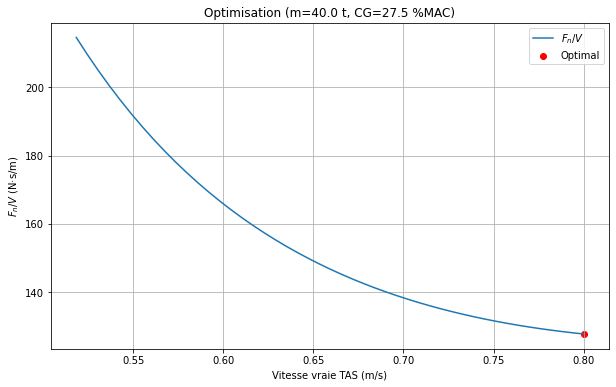

({'dthr': [0.9637446979121724, 'no_dim'], 'aoa': [0.039226460661603936, 'deg'], 'dtrim': [-0.0998162354670841, 'deg'], 'dm': [0.0, 'deg'], 'cz': [0.8012085522429907, 'no_dim'], 'cx': [0.06170667711560173, 'no_dim', 4], 'cm': [-5.551115123125783e-17, 'no_dim', 4], 'fu': [30143.294882569142, 'daN'], 'lod': [12.984146768136629, 'no_dim']}, 0.8, [None, None, None, {'dthr': [0.947328026865038, 'no_dim'], 'aoa': [0.24525220396968767, 'deg'], 'dtrim': [-0.23361413681788487, 'deg'], 'dm': [0.0, 'deg'], 'cz': [1.8751823635452247, 'no_dim'], 'cx': [0.15542631030308565, 'no_dim', 4], 'cm': [0.0, 'no_dim', 4], 'fu': [32835.10207228229, 'daN'], 'lod': [12.0647679269267, 'no_dim']}, {'dthr': [0.9393325465791612, 'no_dim'], 'aoa': [0.23721953902048423, 'deg'], 'dtrim': [-0.22839753769196688, 'deg'], 'dm': [0.0, 'deg'], 'cz': [1.8333095778831459, 'no_dim'], 'cx': [0.15034250950708652, 'no_dim', 4], 'cm': [0.0, 'no_dim', 4], 'fu': [32451.60354152299, 'daN'], 'lod': [12.194219611564561, 'no_dim']}, {'dt

In [ ]:
aircraft = aero_model.Airbus_A319_100()
altp = 12000      # altitude en m
mass = 40000     # masse en kg
cg = 27.5        # centrage en %MAC

sol_opt = optimize_for_range_existing_trim_mass_cg(aircraft, altp, mass, cg, True)
print(sol_opt)

In [150]:
aircraft = aero_model.Airbus_A319_100()
print(aircraft.m)
res= dynamic.get_trim_level_flight(aircraft, 15000, 250, use_saturations=True)
print(res)

73235.0
None


In [151]:
atm =atmosphere.AtmosphereISA()

def atmosphere_properties(atm, altitude, tas):
    """
    Calcule sigma, Mach et densité à partir de l'altitude (m) et TAS (m/s).
    """
    pamb, tamb = atm.atmosphere(altitude)
    rho = atm.air_density(pamb, tamb)
    sigma = rho / atm.rho0
    vsnd = atm.sound_speed(tamb)
    mach = tas / vsnd
    
    return sigma, mach, rho

import numpy as np
import scipy.optimize

def ceiling_altitude(aero_model, atm, tas, dthr, cx, h_min=5000, h_max=20000):
    """
    Trouve l'altitude où poussée = traînée pour une masse donnée.
    - aero_model : ton modèle d'avion (ex: aircraft)
    - atm : ton modèle AtmosphereISA
    - mass : masse actuelle de l'avion (kg)
    - tas_law : fonction qui donne TAS en fonction de l'altitude (m)
    - h_min / h_max : bornes de recherche d'altitude (m)
    """
    
    g = atm.g
    
    def delta_thrust(h):
        pamb, tamb = atm.atmosphere(h)
        rho = atm.air_density(pamb, tamb)
        vsnd = atm.sound_speed(tamb)
        mach = tas / vsnd
        sigma = rho / atm.rho0
        
        q = 0.5 * rho * tas**2
        drag = q * aero_model.w.s * cx
        thrust = aero_model.thrust(sigma, mach, dthr)  # Plein gaz
        
        return thrust - drag

    # Recherche de la racine
    h_opt = scipy.optimize.brentq(delta_thrust, h_min, h_max)
    return h_opt


97860 53506.093246091 [0.04559170155802257, 'no_dim', 4] 160.2647335114622
97860 54603.264842141616 [0.04540425201467755, 'no_dim', 4] 162.2271588197658
97860 55718.997984917616 [0.04522763213468399, 'no_dim', 4] 164.18958412806944
97860 56853.111125731906 [0.045061094926590294, 'no_dim', 4] 166.15200943637305
97860 58005.43322393252 [0.04490395295060473, 'no_dim', 4] 168.11443474467666
97860 59175.80302422271 [0.04475557295265316, 'no_dim', 4] 170.0768600529803
97860 60364.068391447065 [0.044615371035909575, 'no_dim', 4] 172.0392853612839
97860 61570.08569766369 [0.04448280831072521, 'no_dim', 4] 174.0017106695875
97860 62793.71925684355 [0.04435738697093202, 'no_dim', 4] 175.96413597789115
97860 64034.840803001855 [0.04423864675064241, 'no_dim', 4] 177.92656128619475
97860 65293.32900797952 [0.04412616172102906, 'no_dim', 4] 179.88898659449836
97860 66569.06903545938 [0.04401953739125772, 'no_dim', 4] 181.851411902802
97860 67861.95212814305 [0.04391840808185281, 'no_dim', 4] 183.813

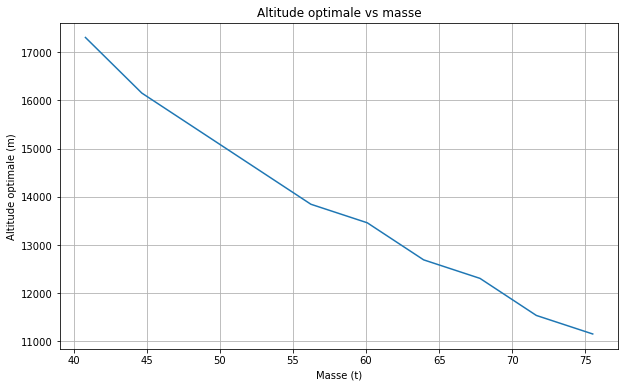

In [170]:
masses = np.linspace(aircraft.oem, aircraft.mtom, 10)
altps = np.linspace(5000, 20000, 40)
cg = 25  # exemple

atm = atmosphere.AtmosphereISA()

altitude_optimale = []
tas_opt_list = []

for mass in masses:
    fn_over_v_list = []
    tas_at_each_alt = []

    for altp in altps:
        sol_opt, tas_opt, solutions = optimize_for_range_existing_trim_mass_cg(aircraft, altp, mass, cg, plot=False)

        if sol_opt is not None:
            fu = sol_opt["fu"][0]  # daN
            fn = fu * 10  # N
            fn_over_v = fn / tas_opt
            fn_over_v_list.append(fn_over_v)
            tas_at_each_alt.append(tas_opt)
        else:
            fn_over_v_list.append(np.nan)
            tas_at_each_alt.append(np.nan)

    fn_over_v_array = np.array(fn_over_v_list)
    tas_at_each_alt = np.array(tas_at_each_alt)

    if np.all(np.isnan(fn_over_v_array)):
        altitude_optimale.append(np.nan)
        tas_opt_list.append(np.nan)
        continue

    idx_opt = np.nanargmin(fn_over_v_array)
    altitude_optimale.append(altps[idx_opt])
    tas_opt_list.append(tas_at_each_alt[idx_opt])

# Maintenant on trace :
plt.figure(figsize=(10,6))
plt.plot(masses/1000, altitude_optimale)
plt.xlabel("Masse (t)")
plt.ylabel("Altitude optimale (m)")
plt.title("Altitude optimale vs masse")
plt.grid()
plt.show()
